In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import mpl_toolkits.mplot3d
import itertools
import seaborn as sns
sns.set()
# %config InlineBackend.figure_format = 'svg'

In [2]:
training_domain = np.linspace(-500, 500, num=100)
X = np.vstack((
  np.repeat(1, 100),
  training_domain**2,
  training_domain**3,
)).transpose()
print("X", X.shape)

X (100, 3)


In [3]:
x2factor = np.random.normal(0, 5)
x3factor = np.random.standard_normal()
Y = (5 + (X[:, 1] * x2factor) + X[:, 2] * x3factor).reshape(X.shape[0], 1)
Y = Y * np.random.normal(1, 0.1, Y.shape)
print("Y", Y.shape)
print("factors are", x2factor, x3factor)

Y (100, 1)
factors are -2.762868092835652 0.32659994369652784


In [4]:
def cost(hypothesis, X, Y):
  return np.sum(np.square(Y - np.inner(hypothesis, X))) / (2 * len(X))

In [5]:
def gradient_descent(X, Y, alpha=1e-4, tolerate=1e-4):
  thetas = np.random.standard_normal(X.shape[1]).reshape(1, X.shape[1])
  i = 0
  while True:
    i += 1
    differences = np.inner(thetas, X).reshape(Y.shape[0], 1) - Y
    derivative_terms = np.average(differences.reshape(Y.shape[0], 1) * X, axis=0)
    thetas = thetas - alpha * derivative_terms
    if np.all(np.abs(derivative_terms) < tolerate):
      break
    if i % 100000 == 0:
      print("derivatives", derivative_terms)
      print("thetas", thetas)
  return thetas

def normal_equation(X, Y):
  return (np.linalg.pinv(X) @ Y).flatten()

# Feature scaling
def scale(X):
  for i in range(1, X.shape[1]):
    X[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])

In [6]:
scale(X)

gradient descent result [ -313639.01903633  -465919.53297552 10462455.00941264]
gradient descent cost 1.7577191573289676e+16
quick [ -463509.66924748  -688556.62418186 15461867.23983966]
quick cost 2.4069238659296936e+16


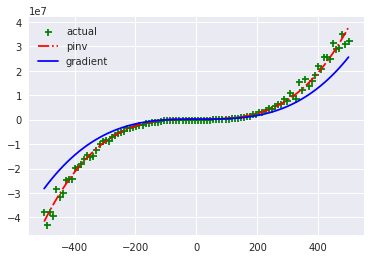

In [7]:
# high tolerance here to get something slightly more inaccurate than normal_equation
gradient_result = gradient_descent(X, Y, tolerate=5e+6).reshape(X.shape[1])
print("gradient descent result", gradient_result)
print("gradient descent cost", cost(gradient_result, X, Y))
quick = normal_equation(X, Y)
print("quick", quick)
print("quick cost", cost(quick, X, Y))
actual = plt.scatter(training_domain, Y, marker='+', color='green')
pinv, = plt.plot(training_domain, np.inner(quick, X), color='red', linestyle='-.')
gradient, = plt.plot(training_domain, np.inner(gradient_result, X), color='blue')
plt.legend((actual, pinv, gradient), ("actual", "pinv", "gradient"))
plt.show()